python 3.13.5

# 2_class_other_model.ipynb

## Data import and test

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, LeaveOneOut
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import matthews_corrcoef

In [2]:
name_data_file="heart_failure_clinical_records_dataset"

data = pd.read_csv(f"../../raw_data/{name_data_file}.csv", na_values=["?"])

# CT Classification Tree

In [3]:
# Split data into features and labels
X = data.drop(columns=["DEATH_EVENT"])
X["creatinine_phosphokinase"] = np.log1p(X["creatinine_phosphokinase"])
y = data["DEATH_EVENT"]

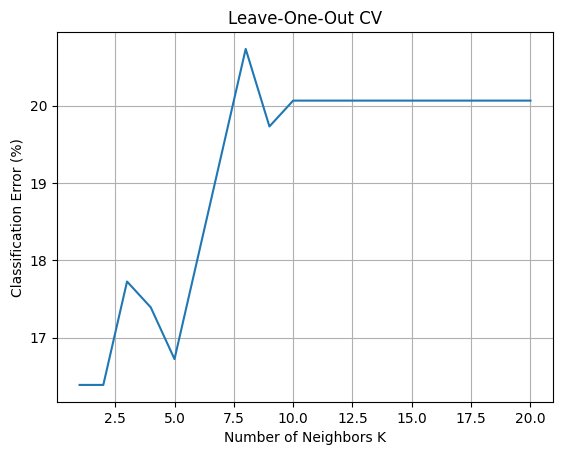

In [7]:
max_depth_for_tree = 20  # Max depth
errors = np.zeros((len(X), max_depth_for_tree))

CV_loo = LeaveOneOut()

# Loop through the folds
for fold, (train_index, test_index) in enumerate(CV_loo.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    for max_depth in range(1, max_depth_for_tree + 1):
    # run over different max_depth values
        clf = DecisionTreeClassifier(max_depth=max_depth, criterion='log_loss', random_state=42) # choose log_loss as criterion but we could also use gini or entropy, need to look on that
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        # Classification error for this fold
        errors[fold, max_depth - 1] = np.mean(y_pred != y_test)
        


# Plot mean errors for each K
mean_errors = np.mean(errors, axis=0)
f = plt.figure()
plt.title('Leave-One-Out CV')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Classification Error (%)')
plt.plot(range(1, max_depth_for_tree + 1), mean_errors * 100)
plt.grid(True)
plt.show()


In [5]:
# Split into train and test sets (e.g., 80% train, 20% test), just a simple split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Define max_depth
max_depth = np.argmin(mean_errors) + 1
max_depth = 3

# Create and train Decision Tree  model
clf = DecisionTreeClassifier(max_depth=max_depth, criterion='log_loss', random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with K={max_depth}: {accuracy:.2%}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
print(f"Mcc: {matthews_corrcoef(y_test, y_pred):.4f}") # calculate Matthews correlation coefficient because in the paper they use it

Accuracy with K=3: 81.67%
Confusion Matrix:
[[40  1]
 [10  9]]
Mcc: 0.5608


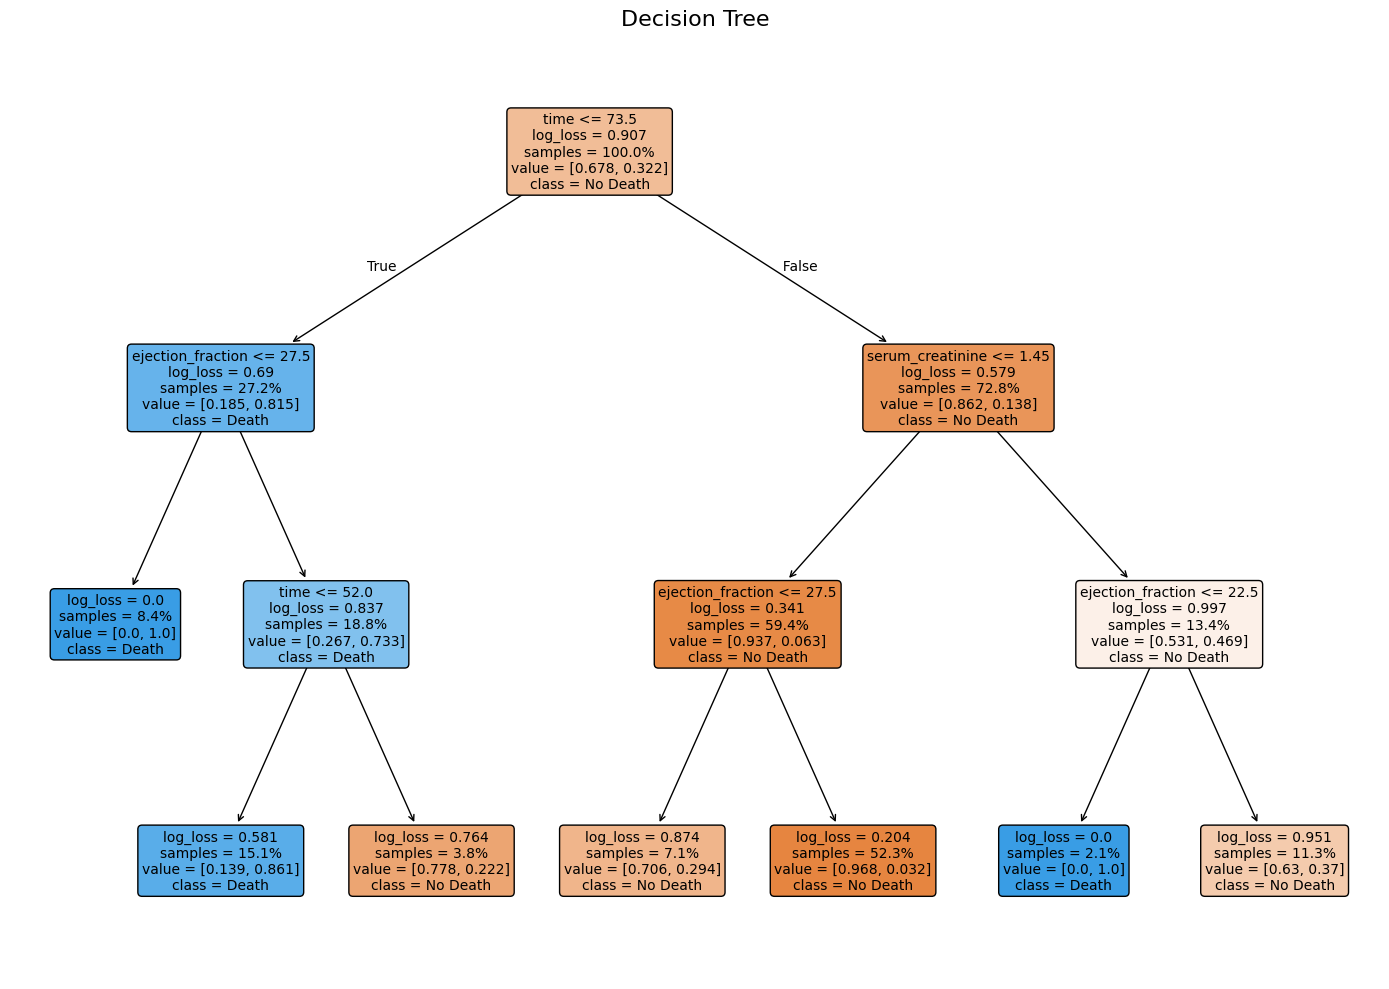

In [6]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import numpy as np
import pandas as pd

# ensure clf and X are defined (clf = fitted DecisionTreeClassifier, X = DataFrame of features)

plt.figure(figsize=(14, 10), dpi=100)
plot_tree(
    clf,
    filled=True,
    rounded=True,
    feature_names=X.columns,
    class_names=['No Death', 'Death'],   # adjust if needed
    impurity=True,                      # hide impurity to reduce clutter (set True if you want it)
    proportion=True,                     # show proportions in nodes (True shows relative to node)
    fontsize=10
)
plt.title('Decision Tree', fontsize=16)
plt.tight_layout()
